<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/vannskade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Leses lokale filer

In [1]:
from google.colab import files
uploaded = files.upload()

Saving naturskade_ikke_pool.xlsx to naturskade_ikke_pool.xlsx
Saving vannskade_frost.xlsx to vannskade_frost.xlsx
Saving vannskade_frost_alle.xlsx to vannskade_frost_alle.xlsx
Saving vannskade_inntregning.xlsx to vannskade_inntregning.xlsx
Saving vannskade_inntrengnin_alle.xlsx to vannskade_inntrengnin_alle.xlsx
Saving vannskade_kjent.xlsx to vannskade_kjent.xlsx
Saving vannskade_lekkasje.xlsx to vannskade_lekkasje.xlsx
Saving vannskade_tilstopp_alle.xlsx to vannskade_tilstopp_alle.xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping.xlsx
Saving vannskade_ukjent.xlsx to vannskade_ukjent.xlsx


Enkel lineær regresjon


In [2]:
def linreg(X, Y):
  Syy = Syy + y*y
  Sxy = Sxy + x*y
  det = Sxx * N - Sx * Sx
  return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

Hente data fra importerte filer

In [6]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)
frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_inntregning.xlsx',header=None,skiprows=3,names=navn)
nat = pd.read_excel('naturskade_ikke_pool.xlsx',header=None,skiprows=3,names=navn)
      
data_frost = []; data_til = []; data_inn = []; data_nat = [];
        
for i in år[:-9]:
    frost1 = frost.loc[frost['år']==i,'skade'].sum()
    tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
    intre1 = intre.loc[intre['år']==i,'skade'].sum()
    nat1 = nat.loc[nat['år']==i,'skade'].sum()
    data_frost.append(frost1)
    data_til.append(tilstopp1)
    data_inn.append(intre1)
    data_nat.append(nat1)
#løse problem med aksenavn, multipliser alle verdier med faktor
new_frost = np.array([i*(10**(-6)) for i in data_frost])
new_til = np.array([i*(10**(-6)) for i in data_til])
new_inn = np.array([i*(10**(-6)) for i in data_inn])
new_nat = np.array([i*(10**(-6)) for i in data_nat])

Plotte data

UnboundLocalError: ignored

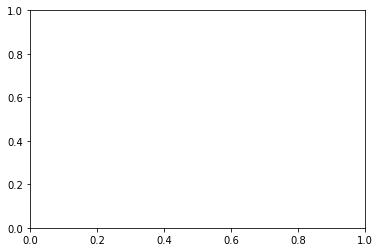

In [12]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])#.astype(np.float)\n",
data_new = np.array([new_frost,new_til,new_inn,new_nat])
tit = np.array(['Vannskade Frost','Vannskade Tilstopp','Vannskade Inntrengning',
                        'Naturaskade Alle'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, ax = plt.subplots()#, figsize=(10,10))\n",
bins = np.linspace(0,50,10)
for i,j in zip(data_new,tit):
  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  trendline=[a*index + b for index in range(len(år))]
  plt.plot(år,trendline,label="Trend",linewidth=3)
  plt.plot(år[:-9],i,label="Utbetalt",color='k',linewidth=3)
  plt.axhline(y=snitt,color='r',label='Snitt',linewidth=3)
  plt.title("Utbetalt,"+str(j),size=20)
  plt.ylabel("Millioner kr",size=15)
  ax = plt.gca()
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  plt.grid(),plt.legend()
  #from google.colab import files\n",
  #plt.savefig(\"vannskade\"+str(j)+\".png\")\n",
  #files.download(\"vannskade\"+str(j)+\".png\")\n",
  plt.show()